# Bias, Variance and regularisation
    
![alt](../img/biasvariance.png) 

## Goals:

    How to choose the best polyfit to describe the function behaviour and predict a trend
 


In [1]:
# Import Libraries
import numpy as np
from scipy.optimize import minimize
from scipy.optimize import curve_fit
import math
import matplotlib.pyplot as plt
import os
import matplotlib.lines as mlines
import itertools
import math
from scipy import stats
from scipy.stats import pearsonr  
from scipy.stats import spearmanr
from sklearn.metrics import r2_score

In [2]:
Vpmag        = np.array([2.5025651501496613,3.6241665283346278, 4.5125663357343422, 5.3561187289356731, 6.4611815337388379])
Vt           = np.array([-0.92865887,  -0.78003195, -0.15118985, 0.3911321 ,  0.99889706 ])
subpart      = (Vt)/ (Vpmag )
Wstar        = np.array([0,0.25,0.5,0.75,1,])

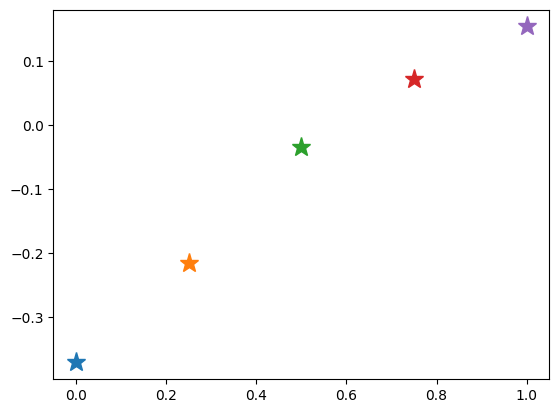

In [3]:
# Visualise the data
for item in range (len(Wstar)):
    plt.plot(Wstar[item],subpart[item], marker="*",markersize=14,) 
plt.show()

# Linear Regression with Numpy Polyfit function

In [4]:
#define function to calculate r-squared
def polyfit(x, y, degree):
    results = {}
    coeffs  = np.polyfit(x, y, degree)
    p       = np.poly1d(coeffs)
    
    #calculate r-squared
    yhat    = p(x)
    ybar    = np.sum(y)/len(y)
    ssreg   = np.sum((yhat-ybar)**2)
    sstot   = np.sum((y - ybar)**2)
    results['r_squared'] = ssreg / sstot

    return results

#E. g., for finding the r-squared of polynomial model with degree = 3, appy as below
#polyfit(xm, ym, 3)

{'r_squared': 0.977336215861069}
PearsonRResult(statistic=0.9886031639950726, pvalue=0.0014580300494141803)


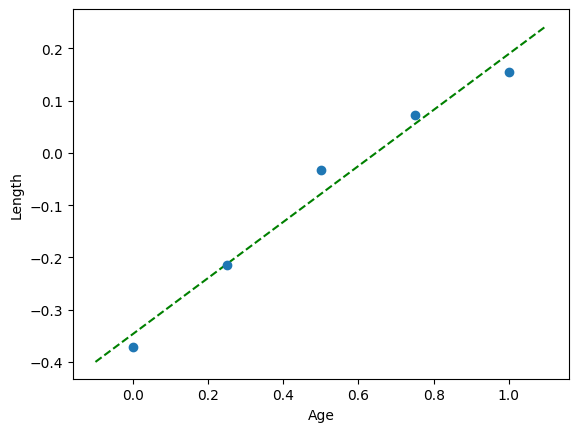

In [5]:
# Apply linear regression to our initial data
x       = Wstar
y       = subpart
mymodel = np.poly1d(np.polyfit(x, y, 1))
myline  =  np.arange(-0.1, 1.1, 0.01)

plt.plot(myline, mymodel(myline), color="green" ,linestyle = 'dashed',)
plt.plot(x, y, 'o')
plt.xlabel('Age')
plt.ylabel('Length')
print(polyfit(x, y, 1))
print(pearsonr(x, y))
plt.show()

Linear Regression vs higher degree polynomial with Numpy Polyfit function

{'r_squared': 0.9968116426929176}
PearsonRResult(statistic=0.9886031639950726, pvalue=0.0014580300494141803)


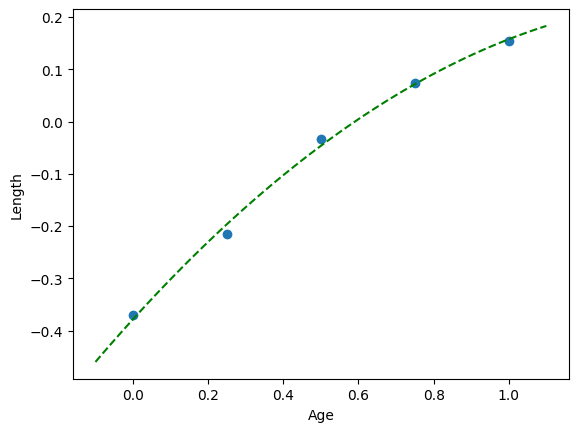

In [6]:
# Apply a degree 2 polynomial function
mymodel = np.poly1d(np.polyfit(x, y, 2))
myline  =  np.arange(-0.1, 1.1, 0.01)
plt.plot(x, y, 'o')
plt.plot(myline, mymodel(myline), color="green" ,linestyle = 'dashed',)
plt.xlabel('Age')
plt.ylabel('Length')
print(polyfit(x, y, 2))
print(pearsonr(x, y))
plt.show()

{'r_squared': 0.9982186971720884}
SignificanceResult(statistic=0.9999999999999999, pvalue=1.4042654220543672e-24)


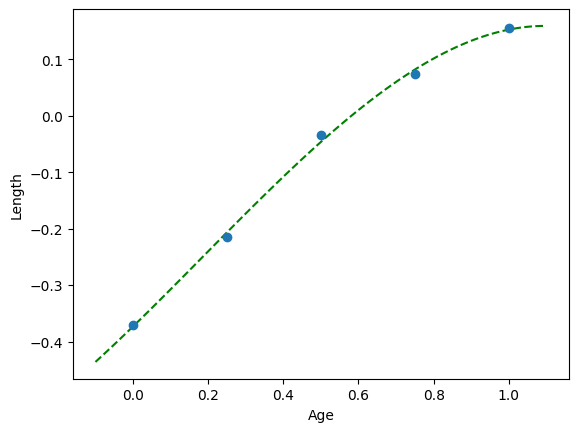

In [7]:
# Apply a degree 3 polynomial function
mymodel = np.poly1d(np.polyfit(x, y, 3))
myline  =  np.arange(-0.1, 1.1, 0.01)

plt.plot(myline, mymodel(myline), color="green" ,linestyle = 'dashed',)
plt.plot(x, y, 'o')
plt.xlabel('Age')
plt.ylabel('Length')
print(polyfit(x, y, 3))
print(spearmanr(Wstar,subpart))
plt.show()

{'r_squared': 0.9999999999999949}
SignificanceResult(statistic=0.9999999999999999, pvalue=1.4042654220543672e-24)


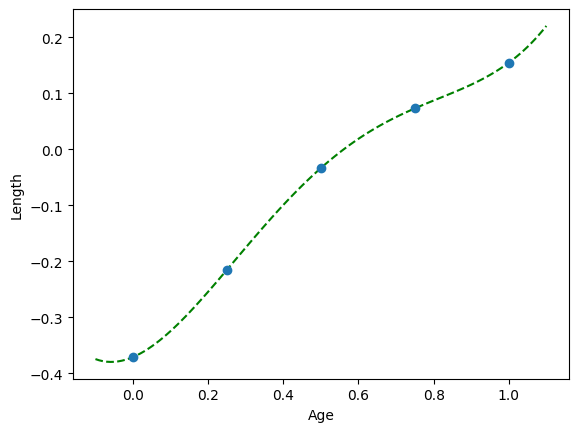

In [8]:
# Apply a degree 4 polynomial function
mymodel = np.poly1d(np.polyfit(x, y, 4))
myline  =  np.arange(-0.1, 1.1, 0.01)

plt.plot(myline, mymodel(myline), color="green" ,linestyle = 'dashed',)
plt.plot(x, y, 'o')
plt.xlabel('Age')
plt.ylabel('Length')
print(polyfit(x, y, 4))
print(spearmanr(Wstar,subpart))
plt.show()